In [ ]:
# ANALYSING THE AUDIO FEATURES OF SPOTIFY TOP 100 TRACKS FOR THE YEAR 2018

In [31]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import pandas as pd
import seaborn as sns 
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
df = pd.read_csv('2018.csv')

In [115]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,Rank
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,3.316217,4,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,2.776767,4,2
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,3.635783,4,3
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,3.690667,4,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,3.632083,4,5


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null int64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_min        100 non-null float64
time_signature      100 non-null int64
Rank                100 non-null int64
dtypes: float64(10), int64(4), object(3)
memory usage: 13.4+ KB


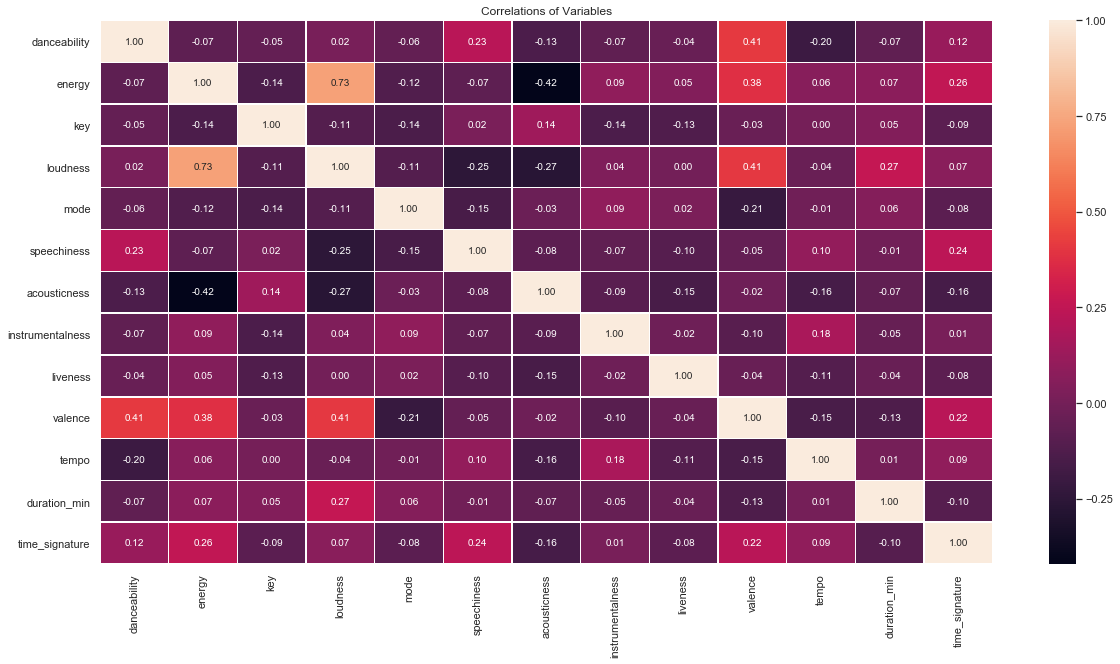

In [117]:
#Finding the correlation between audio features

f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.iloc[:,3:16].corr(),annot=True,linewidth=.5,fmt=".2f",ax=ax)
plt.title("Correlations of Variables")
plt.show()

In [ ]:
#From the above correlation matrix we can see that energy and loudness are highly correlated, means if the loudness of a track increases then chances of it being energetic are quite higher.

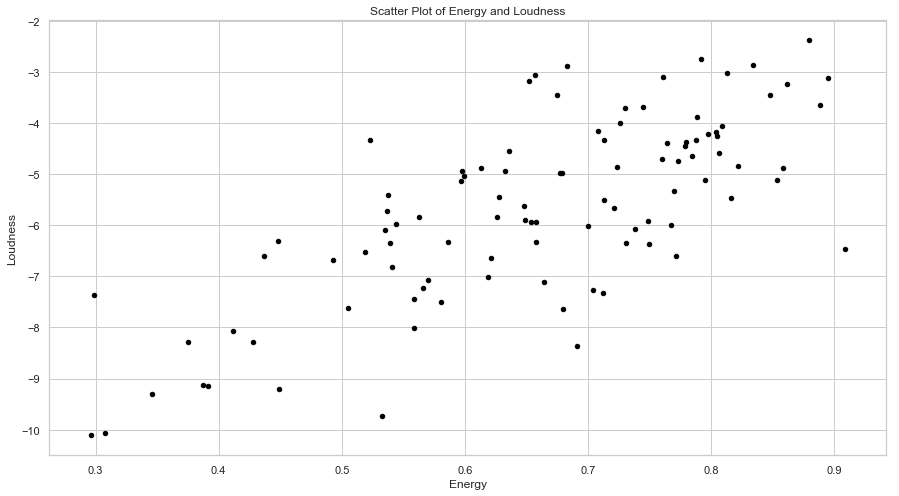

In [118]:
# Creating a scatter plot between loudness and energy

plt.rcParams['axes.facecolor'] = 'w'
df.plot(kind="scatter",x="energy",y="loudness",color="black",figsize=(15,8))
plt.title("Scatter Plot of Energy and Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

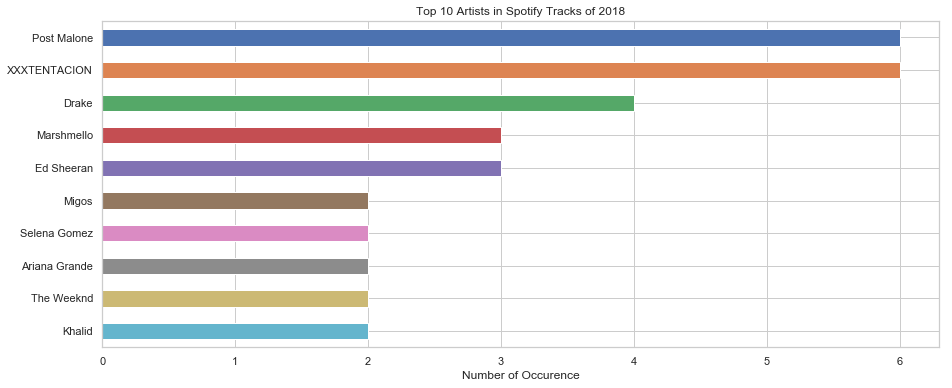

In [103]:
# Now, we look at the which artist's songs are in our spotify tracks.
#Firstly, we need to count the values after that we select the top 10 numbers and plot the bar graph.

df['artists'].value_counts()[:10].plot(kind='barh',figsize=(15,6))
plt.title("Top 10 Artists in Spotify Tracks of 2018")
plt.xlabel("Number of Occurence")
plt.gca().invert_yaxis() # inverted the y axis.
plt.show()

# We see that Post Malone and XXTENTACION are the most popular artist the tracks.

Text(0.5, 1.0, 'Liveness Distribution')

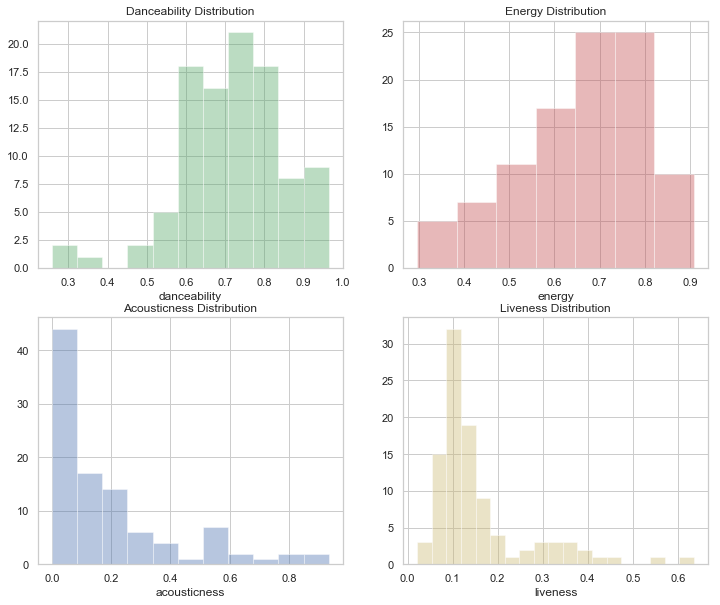

In [105]:
#distribution of audio features

#Setup matplotlib figure
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

#Graph danceability
sns.distplot(df.danceability, kde=False, color="g", ax=axes[0][0]).set_title('Danceability Distribution')

#Graph energy
sns.distplot(df.energy, kde=False, color="r", ax=axes[0][1]).set_title('Energy Distribution')

#Graph energy
sns.distplot(df.acousticness, kde=False, color="b", ax=axes[1][0]).set_title('Acousticness Distribution')

#Liveness energy
sns.distplot(df.liveness, kde=False, color="y", ax=axes[1][1]).set_title('Liveness Distribution')

Text(0.5, 1.0, 'Duration Distribution')

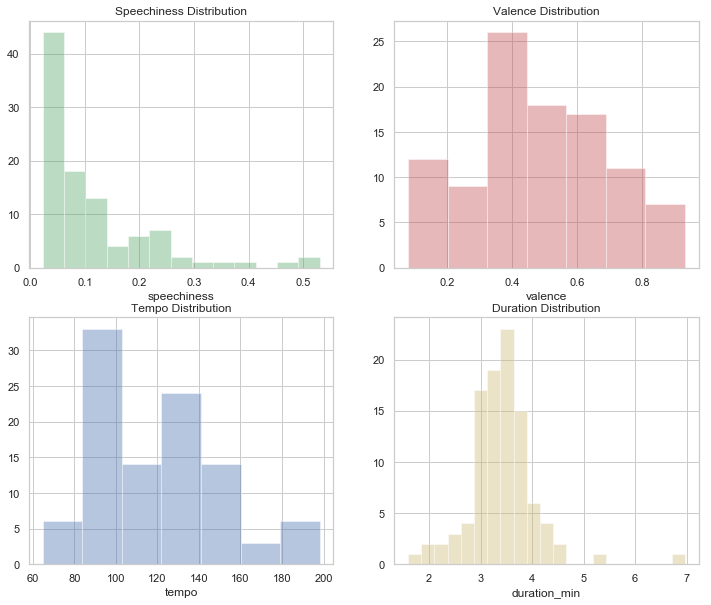

In [120]:
#Setup matplotlib figure
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

#Graph energy
sns.distplot(df.speechiness, kde=False, color="g", ax=axes[0][0]).set_title('Speechiness Distribution')

#Graph energy
sns.distplot(df.valence, kde=False, color="r", ax=axes[0][1]).set_title('Valence Distribution')

#Liveness energy
sns.distplot(df.tempo, kde=False, color="b", ax=axes[1][0]).set_title('Tempo Distribution')

#Graph energy
sns.distplot(df.duration_min, kde=False, color="y", ax=axes[1][1]).set_title('Duration Distribution')

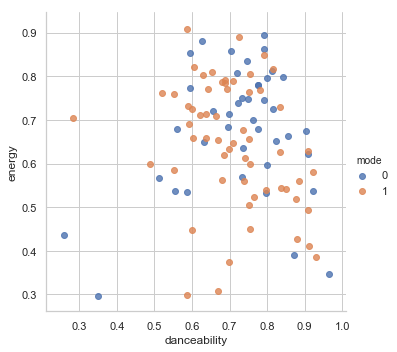

In [107]:
sns.lmplot(x='danceability', y='energy', data=df,
           fit_reg=False, # No regression line
           hue='mode')   # Color by evolution stage

#Mode indicates the modality (major or minor) of a track

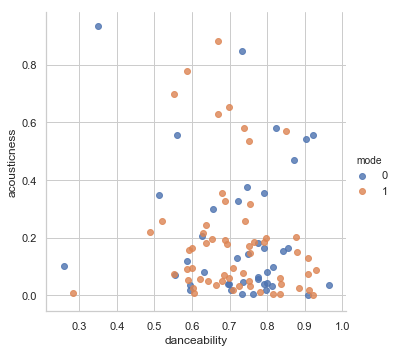

In [108]:
sns.lmplot(x='danceability', y='acousticness', data=df,
           fit_reg=False, # No regression line
           hue='mode')   # Color by evolution stage

#Mode indicates the modality (major or minor) of a track

In [111]:
#Songs in which key are louder? In order to do so, we first need to convert the key variable from numeric to object

df["key_string"] = df["key"].replace({0: "C", 1: "C#", 2: "D", 3: "D#", 
                                                    4: "E", 5: "F", 6: "F#", 7: "G",
                                                    8: "G#", 9: "A", 10: "A#", 11: "B"})

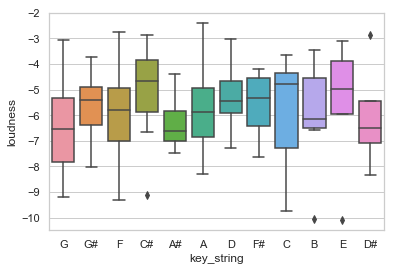

In [112]:
sns.boxplot(x="key_string", y="loudness", data=df)

In [ ]:
#Model Creation
#Our aim is to create a model which will predict the rank of a song based on its audio features

#Since our dependent variable is a Rank of the song which is a ordinal varibale we will be using ordinal logistic regression 
#to create our model

In [3]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,16].values

In [4]:
x

array([[  0.754     ,   0.449     ,   7.        , ...,  77.169     ,
          3.31621667,   4.        ],
       [  0.74      ,   0.613     ,   8.        , ...,  75.023     ,
          2.77676667,   4.        ],
       [  0.587     ,   0.535     ,   5.        , ..., 159.847     ,
          3.63578333,   4.        ],
       ...,
       [  0.552     ,   0.76      ,   0.        , ..., 135.702     ,
          4.33333333,   5.        ],
       [  0.258     ,   0.437     ,  11.        , ..., 180.043     ,
          3.98333333,   4.        ],
       [  0.553     ,   0.586     ,  11.        , ..., 126.684     ,
          3.27288333,   4.        ]])

In [5]:
y

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [17]:
#Splitting the dataset ito training set and test set
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
#For ordinal logistic regression we will import mord library

import mord

In [20]:
regressor = mord.OrdinalRidge()

In [21]:
#fitting the regressor to the traiing set

regressor.fit(x_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
#predicting the test set result

y_pred = regressor.predict(x_test)

In [23]:
y_pred

array([54., 61., 62., 64., 68., 77., 43., 56., 47., 49., 50., 47., 41.,
       62., 44., 57., 46., 48., 48., 46.])

In [24]:
y_test

array([27, 87,  3, 56, 76, 94, 17, 74, 55, 96, 54, 93, 79, 14,  8, 31, 23,
       25, 34,  9], dtype=int64)

In [28]:
y_final = y_test, y_pred

In [29]:
y_final

(array([27, 87,  3, 56, 76, 94, 17, 74, 55, 96, 54, 93, 79, 14,  8, 31, 23,
        25, 34,  9], dtype=int64),
 array([54., 61., 62., 64., 68., 77., 43., 56., 47., 49., 50., 47., 41.,
        62., 44., 57., 46., 48., 48., 46.]))

In [37]:
result = pd.DataFrame(list(y_final))
result = result.transpose()
result.columns = ["Actual Song Rank", "Predicted Song Rank"]
result

,Actual Song Rank,Predicted Song Rank
0,27.0,54.0
1,87.0,61.0
2,3.0,62.0
3,56.0,64.0
4,76.0,68.0
5,94.0,77.0
6,17.0,43.0
7,74.0,56.0
8,55.0,47.0
9,96.0,49.0
